In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

In [0]:
os.environ['KAGGLE_USERNAME']="dilshavijay"
os.environ['KAGGLE_KEY']="8d2bb5120682473e6f866d1b627623d0"

In [0]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 611M/612M [00:06<00:00, 125MB/s]
100% 612M/612M [00:06<00:00, 94.3MB/s]


In [0]:
!ls

data  gtsrb-german-traffic-sign.zip  sample_data


In [0]:
!unzip -q gtsrb-german-traffic-sign

In [0]:
!ls

data			       meta  Meta.csv	  test	Test.csv  Train
gtsrb-german-traffic-sign.zip  Meta  sample_data  Test	train	  Train.csv


In [0]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "/content/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
                  
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

/content/Train/0/
/content/Train/1/
/content/Train/2/
/content/Train/3/
/content/Train/4/
/content/Train/5/
/content/Train/6/
/content/Train/7/
/content/Train/8/
/content/Train/9/
/content/Train/10/
/content/Train/11/
/content/Train/12/
/content/Train/13/
/content/Train/14/
/content/Train/15/
/content/Train/16/
/content/Train/17/
/content/Train/18/
/content/Train/19/
/content/Train/20/
/content/Train/21/
/content/Train/22/
/content/Train/23/
/content/Train/24/
/content/Train/25/
/content/Train/26/
/content/Train/27/
/content/Train/28/
/content/Train/29/
/content/Train/30/
/content/Train/31/
/content/Train/32/
/content/Train/33/
/content/Train/34/
/content/Train/35/
/content/Train/36/
/content/Train/37/
/content/Train/38/
/content/Train/39/
/content/Train/40/
/content/Train/41/
/content/Train/42/


In [0]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Using TensorFlow backend.


In [0]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


In [0]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))



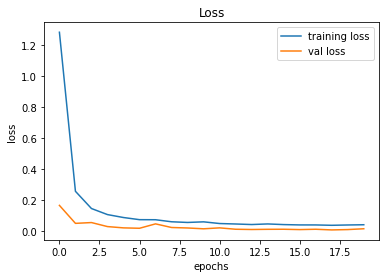

In [0]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [0]:
#Predicting with the test data
y_test=pd.read_csv("/content/Test.csv")
labels=y_test['Path']
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('/content/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9729216152019002